## **Importing files and libraries**

### Libraries

In [1]:
# For Data
import pandas as pd
import numpy as np

import os

# Graphics
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit


### Files

#### Load

In [2]:
# Verificar el directorio actual
print("Directorio actual:", os.getcwd())

# Cambiar al directorio superior (bajar un nivel)
os.chdir('../..')

# Verificar el nuevo directorio
print("Nuevo directorio actual:", os.getcwd())

Directorio actual: d:\lenovo\Documents\GitHub\Energy-and-linear-momentum-change-exerted-by-the-solar-wind-for-applications-in-electric-solar-sails\Codes\Past
Nuevo directorio actual: d:\lenovo\Documents\GitHub\Energy-and-linear-momentum-change-exerted-by-the-solar-wind-for-applications-in-electric-solar-sails


In [3]:
#Function for simply the files load
def dir(r_or_p, year):
    rp = ("Raw", "Calibrated",)
    r_or_p = r_or_p.strip().capitalize()
    if r_or_p not in rp: #Validate data
        raise NameError("Only Raw or Processed")

    if r_or_p == rp[0]:
      dir = f"Data/Raw_converter/{year}.parquet"
      return dir

    else:
      dir = f"Data/Processing_converter/{year}.parquet"

      return dir



In [4]:
#Years that have a analysis
i_year = 1998
f_year = 2023
step_year = 5
other_year = 2000

years = [year for year in range(i_year, f_year + step_year, step_year)] #+ [other_year]

years.sort()

years

[1998, 2003, 2008, 2013, 2018, 2023]

#### Raw data

In [5]:
Raw_data = {}
for year in years:
  Raw_data[year] = pd.read_parquet(dir("Raw",year))


Raw_data

{1998:         YY  MON  DY  DOY:HH:MM:SS     Seconds  SPEED     Np  Vth  N/S  V_He  \
 0       98  Jan   1  001:00:00:30        30.0    361  10.08   32 -0.5   370   
 1       98  Jan   1  001:00:01:00        60.0    358  10.21   31  0.0   366   
 2       98  Jan   1  001:00:01:30        90.0    362  10.08   32 -0.0   371   
 3       98  Jan   1  001:00:02:00       120.0    360  10.09   32 -0.3   369   
 4       98  Jan   1  001:00:02:30       150.0    358  10.71   30 -0.7   366   
 ...     ..  ...  ..           ...         ...    ...    ...  ...  ...   ...   
 619716  98  Dec  21  355:17:27:16  30648436.0    318  13.51   23  5.3   320   
 619717  98  Dec  21  355:17:27:46  30648466.0    317  13.47   23  5.1   320   
 619718  98  Dec  21  355:17:28:16  30648496.0    319  13.08   23  5.1   322   
 619719  98  Dec  21  355:17:28:46  30648526.0    319  11.60   23  5.0   322   
 619720  98  Dec  21  355:17:29:16  30648556.0    324  10.40   23  4.5   327   
 
         GSE_X  GSE_Y  GSE_Z  RA

#### Processed/ Calibrated data

In [6]:
Calibrated_data = {}
for year in years:
  Calibrated_data[year] = pd.read_parquet(dir("Calibrated",year))


Calibrated_data

{1998:        YY  MON  DY  DOY:HH:MM:SS     Seconds  SPEED     Np  Vth  N/S  V_He  \
 0      98  Jan   1  001:00:05:02       302.0    371  10.08   35 -0.8   383   
 1      98  Jan   1  001:00:10:03       603.0    371   9.80   35 -0.9   383   
 2      98  Jan   1  001:00:15:05       905.0    370   9.00   36  0.3   383   
 3      98  Jan   1  001:00:20:11      1211.0    372   7.25   38  1.5   387   
 4      98  Jan   1  001:00:25:10      1510.0    370   8.36   37  0.3   384   
 ...    ..  ...  ..           ...         ...    ...    ...  ...  ...   ...   
 62155  98  Dec  21  355:17:07:38  30647258.0    336  15.01   24  5.6   338   
 62156  98  Dec  21  355:17:12:39  30647559.0    332  14.50   23  3.8   335   
 62157  98  Dec  21  355:17:17:41  30647861.0    334  13.97   24  3.9   337   
 62158  98  Dec  21  355:17:22:43  30648163.0    334  14.58   23  4.7   337   
 62159  98  Dec  21  355:17:27:46  30648466.0    333  13.76   23  4.9   335   
 
        GSE_X  GSE_Y  GSE_Z  RANGE  HGLAT  H

## **Calculo momento lineal**


### Curve fit

In [7]:
"""
suposiciones:
- los protondes son masas puntuales
  no hay interacciones internas entre ellos
-
"""

'\nsuposiciones:\n- los protondes son masas puntuales\n  no hay interacciones internas entre ellos\n-\n'

In [8]:
"""
Parametros:
m = masa proton = 1.67262192369 * 10**-27 kg
velocidad = "SPEED"
Factor lorentz = fl
direccion = "N/S"


No es tan facil como decir que momento lineal y ya XD
Parece que tenemos mas de una ecuacion/metodo para hallar la aceleracion que produce el viento solar

toca tener en cuenta el voltaje de la malla, o cuerda de la vela

Se encontraron dos metodos para hallar la aceleracion proporcionada a una vela electrica

"""

'\nParametros:\nm = masa proton = 1.67262192369 * 10**-27 kg\nvelocidad = "SPEED"\nFactor lorentz = fl\ndireccion = "N/S"\n\n\nNo es tan facil como decir que momento lineal y ya XD\nParece que tenemos mas de una ecuacion/metodo para hallar la aceleracion que produce el viento solar\n\ntoca tener en cuenta el voltaje de la malla, o cuerda de la vela\n\nSe encontraron dos metodos para hallar la aceleracion proporcionada a una vela electrica\n\n'

In [9]:
def DeltaV(year):
  """

  Lineal momentum
  p_i = p_f
    m_p*v_p_i + m_s*v_s_i = m_p*v_p_f +  m_s*v_s_f

    dv_s = -(m_p / m_s) * dv_p

    if v_s_i = 0:
      m_p*v_p_i = m_p*v_p_f +  m_s*v_s_f

  Energy
  E_i = E_f
    m_p*(v_p_i**2) + m_s*(v_s_i**2) = m_p*(v_p_f**2) +  m_s*(v_s_f**2)


    if v_s_i = 0:
      m_p*(v_p_i**2) = m_p*(v_p_f**2) +  m_s*(v_s_f**2)

  """

  mp = 1.6726 * 10**-27 # Proton mas in kilograms
  mv = 100 ## Sail mas in kilograms
  vv = 0 #Sail velocity in m/s
  vp = Calibrated_data[year]["SPEED"]
  dp = Calibrated_data[year]["Np"]
  theta = Calibrated_data[year]["N/S"]
  sec = Calibrated_data[year]["Seconds"]
  dvf=[]
  dv=[]
  vf= 0
  for i in range(0,len(vp),1):
    v =2*((1000 * vp[i] * np.cos(theta[i] * np.pi/180) * dp[i]*100**3 *(sec[i]-sec[0]))-vv)/(1+(mv/mp)) #*dp[i]*(sec[i]-sec[0])
    vf += v
    dv.append(v)
    dvf.append(vf)


  def ec(x, a, b):
    return a*x +b#a + (b**((c*x) + d))


  param, cov = curve_fit(ec, sec, dvf)

  incert = np.sqrt(np.diag(cov))

  print(param)
  print(incert)


  def ec1(x, a, b, c):
    return a + b*x + c*(x**2)#a + (b**((c*x) + d))


  param1, cov1 = curve_fit(ec1, sec, dvf)

  incert1 = np.sqrt(np.diag(cov1))

  print(param1)
  print(incert1)


  def ec2(x, a, b, c):
    return a + b*(x**c)#a + (b**((c*x) + d))


  param2, cov2 = curve_fit(ec2, sec, dvf, p0=[param[0], param[1]*abs(param[0]), 1 + np.emath.logn(abs(sec[len(dvf)-1]), abs(1/param[1]))])

  incert2 = np.sqrt(np.diag(cov2))

  print(param2)
  print(incert2)


  def ec3(x, a, b, c, d, e):
    return a + b*(c**((d*x) + e))#a + (b**((c*x) + d))


  param3, cov3 = curve_fit(ec3, sec, dvf)

  incert3 = np.sqrt(np.diag(cov3))

  print(param3)
  print(incert3)



  def ec1p(x, a, b, c, d, e, f, g):
    return a + b*x + c*(x**2) + d*(x**3) + e*(x**4) + f*(x**5) + g*(x**6) #a + (b**((c*x) + d))


  param1p, cov1p = curve_fit(ec1p, sec, dvf, p0=(param1[1],param1[2],0,0,0,0,0), maxfev=10000)

  incert1p = np.sqrt(np.diag(cov1p))

  print(param1p)
  print(incert1p)



  plt.scatter(sec, dvf, color="#3366FF", s=1)
  plt.scatter(sec, ec(sec, *param), color="red", s=1)
  plt.scatter(sec, ec1(sec, *param1), color="red", s=1)
  #plt.scatter(sec, ec2(sec, *param2), color="red", s=1)
  #plt.scatter(sec, ec3(sec, *param3), color="red", s=1)
  plt.scatter(sec, ec1p(sec, *param1p), color="red", s=1)
  plt.ylim(-1e-5,1e-4)
  plt.ylabel(f"Delta V (m/s) {year}")
  plt.xlabel("Seconds (s)")
  plt.title("Delta V")
  plt.show()






[ 2.06283133e-12 -3.78441069e-06]
[1.87516951e-15 2.86121960e-08]
[-3.79579352e-06  2.06526039e-12 -7.63270265e-23]
[4.55193917e-08 7.78409503e-15 2.37392053e-22]
[-3.49561584e-06  1.60476317e-12  1.01441317e+00]
[5.79383513e-08 7.13584519e-14 2.55240945e-03]
[-2.07395381e+03  2.07395380e+03  1.00000000e+00  2.89612614e-01
  2.00285564e+00]
[6.92109140e+03 6.92109139e+03 7.97047892e-14 3.22894370e-01
 5.12303367e+01]
[-1.43356577e-06  2.57141629e-12 -8.52969235e-19  1.55619766e-25
 -1.03505451e-32  2.84673175e-40 -2.71230949e-48]
[2.08503441e-08 2.08673041e-14 6.63337370e-21 9.13537636e-28
 6.05392980e-35 1.87459060e-42 2.16696262e-50]


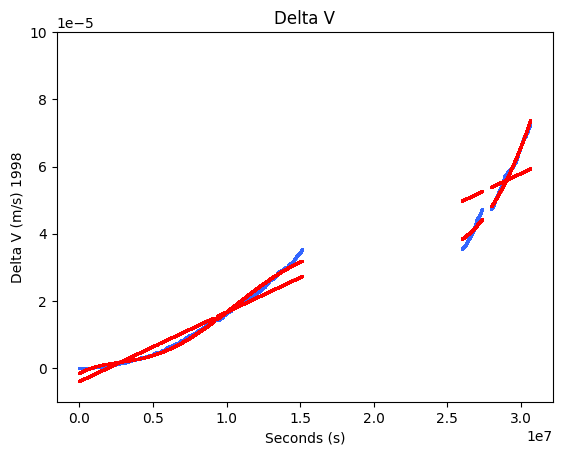

[ 4.43218388e-12 -7.20476823e-04]
[3.27340724e-15 5.68370692e-07]
[ 3.12965076e-03 -4.00956540e-11  1.28386156e-19]
[2.17524621e-06 2.51372909e-14 7.24587274e-23]
[ 4.80269179e-05 -4.99647712e-14 -2.20275528e+00]
[inf inf inf]
[-1.14888820e-04 -1.16046242e-04  1.00000000e+00  1.00000000e+00
  1.00000000e+00]
[inf inf inf inf inf]


C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[-2.77910428e-03  2.52056159e-09 -6.38999525e-17  6.45707604e-25
 -3.20949024e-33  7.78005737e-42 -7.26679041e-51]
[7.01474258e-04 7.51677616e-11 2.07845711e-18 2.37896483e-26
 1.36815589e-34 3.93782273e-43 4.53309365e-52]


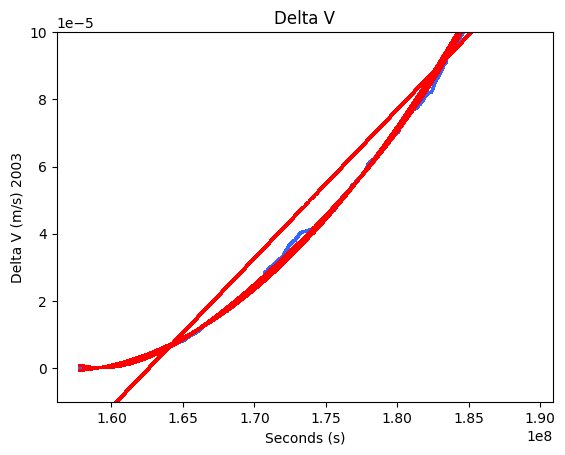

[ 2.60048669e-12 -8.33636216e-04]
[2.00583488e-15 6.64569929e-07]
[ 7.45214793e-03 -4.74586878e-11  7.55524336e-20]
[4.67851629e-06 2.82589642e-14 4.26468628e-23]
[ 2.76302527e-05 -3.62622168e-14 -2.30840395e+00]
[inf inf inf]
[-7.41849130e-05 -7.37336436e-05  1.00000000e+00  1.00000000e+00
  1.00000000e+00]
[inf inf inf inf inf]
[ 3.54065838e+01 -4.29040533e-07  1.62347983e-15  1.02117317e-26
 -1.49371449e-32  3.61497577e-41 -2.73470823e-50]
[3.79694723e-02 4.58705242e-10 1.73176714e-18 3.61259775e-29
 1.57760697e-35 3.81056668e-44 2.87567407e-53]


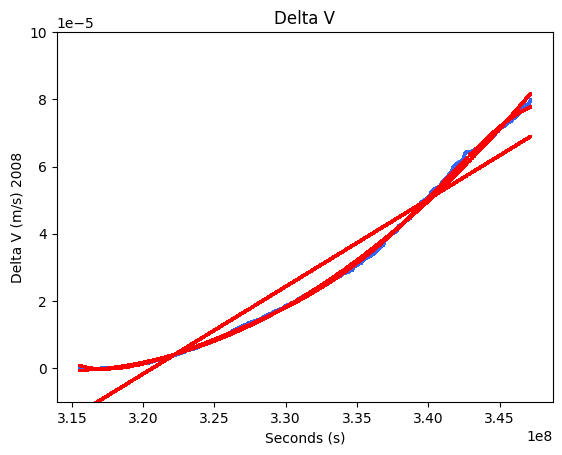

[ 2.74691812e-12 -1.31358637e-03]
[1.70445152e-15 8.34130119e-07]
[ 1.41904058e-02 -6.06394369e-11  6.47650575e-20]
[1.30916870e-05 5.35184262e-14 5.46806265e-23]
[ 3.04816313e-05 -6.20463480e-14 -2.35687395e+00]
[inf inf inf]
[-7.76182056e-05 -7.80516954e-05  1.00000000e+00  1.00000000e+00
  1.00000000e+00]
[inf inf inf inf inf]
[-1.34941857e+00  6.40351506e-09 -8.30640075e-19 -2.80455885e-26
 -4.94065646e-37  1.11863095e-43 -1.02640632e-52]
[1.10273634e-02 8.50618877e-11 2.68319892e-19 3.97190053e-28
 1.67935356e-37 7.53494490e-46 6.02795177e-55]


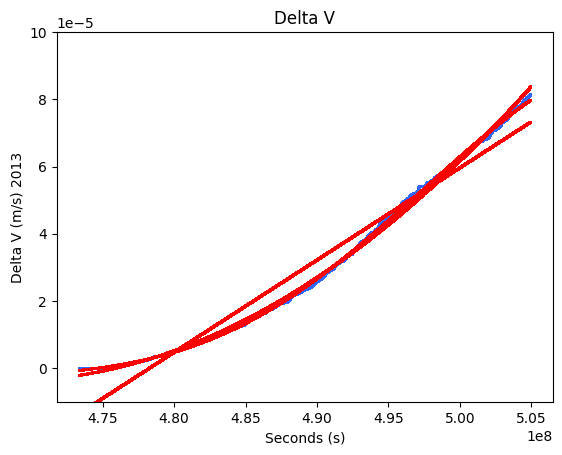

[ 2.13710135e-12 -1.35956651e-03]
[1.63319696e-15 1.05632605e-06]
[ 2.33254973e-02 -7.41944181e-11  5.89966249e-20]
[1.90084994e-05 5.87747469e-14 4.54260650e-23]
[ 2.25394770e-05 -5.12477625e-14 -2.38628378e+00]
[inf inf inf]
[-6.10638986e-05 -6.13721463e-05  1.00000000e+00  1.00000000e+00
  1.00000000e+00]
[inf inf inf inf inf]
[ 1.80774653e+00 -6.17560886e-09  4.60339992e-21  1.51979999e-26
  2.81939776e-36 -3.71705164e-44  2.44011722e-53]
[2.84578000e-02 1.01509585e-10 8.86347035e-22 3.71346757e-28
 6.32458627e-37 8.05800471e-46 4.28149927e-55]


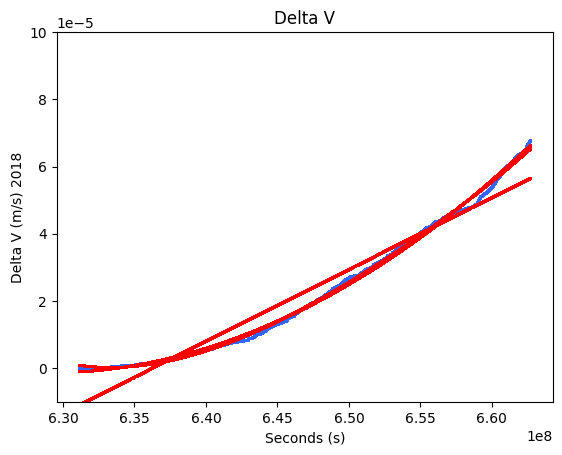

[ 1.28984474e-12 -1.02045495e-03]
[1.78412908e-15 1.42000263e-06]
[ 6.51364522e-02 -1.64988958e-10  1.04478540e-19]
[4.73297373e-05 1.18957748e-13 7.47449605e-23]
[ 6.12923334e-06 -2.35462246e-14 -2.40658159e+00]
[inf inf inf]
[ 2.1753941e+07 -2.1753941e+07  1.0000000e+00  1.0000000e+00
  1.0000000e+00]
[inf inf inf inf inf]
[-5.53355513e+00  1.37986698e-08 -3.11323806e-21  4.55230857e-30
 -6.66691843e-35  9.95523321e-44 -4.12724221e-53]
[2.11101481e-02 5.29712925e-11 2.96725956e-23 4.34775635e-32
 2.62293587e-37 3.95601746e-46 1.65816016e-55]


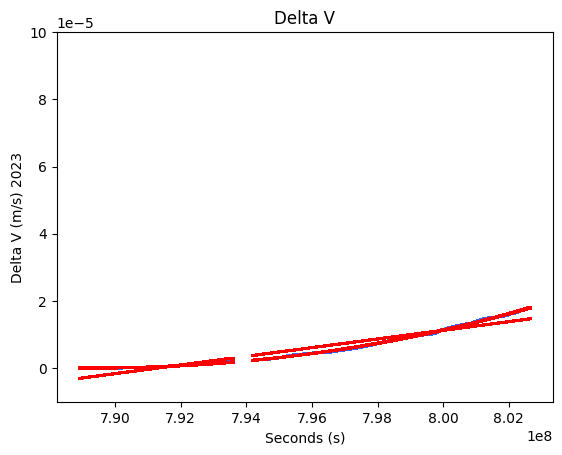

In [10]:
for year in years:
  DeltaV(year)

### Clasical vs Relativistic

In [11]:
def DeltaV_clasical(mp, mv, vvi, vpi, J, I):
   
    Ec = (2*J) + (mp*(vpi**2)) + (mv*(vvi**2))
   
    Pc = I + (mp*vpi) + (mv*vvi)

    vvfc1 = mv*Pc

    vvfc2 = mv*mp*( (Ec*(mv + mp)) - (Pc**2) )

    vvfc3 = mv*(mv + mp)

    vvfc_mas = ( vvfc1 + (abs(vvfc2)**(1/2)) )/vvfc3

    vvfc_menos = ( vvfc1 - (abs(vvfc2)**(1/2)) )/vvfc3

    vvfc = vvfc_mas

    DeltaVc = vvfc - vvi

    
    print(vvfc)
    print(DeltaVc)

    return vvfc

In [12]:
def DeltaV_relativistical(mp, mv, vvi, vpi, J, I):
    #Constants
    c = 299792458 #m/s

    zvi = mv / (abs((c**2)-(vvi**2))**(1/2))
    wvi = zvi * vvi

    zpi = mp / (abs((c**2)-(vpi**2))**(1/2))
    wpi = zpi * vpi

    Pr = (I/c) + wpi + wvi

    Er = (J/(c**3)) + zpi + zvi


    vvfr1 = 8*(mv**2)*(c**2)*Pr*Er

    vvfr2_1_1 = ((mp**2) + (Pr**2) - ((c**2)*(Er**2)))**2

    vvfr2_1_2 = (mv**4) + (2*(mv**2)*(((c**2)*(Er**2)) - (mp**2) + (Pr**2)))

    vvfr2_1_3 = (mv**4) - (2*(mv**2)*(((c**2)*(Er**2)) + (mp**2) + (Pr**2)))

    vvfr2_1 = vvfr2_1_2 + vvfr2_1_1

    vvfr2_2 = vvfr2_1_3 + vvfr2_1_1

    vvfr2_3 = 4*(c**2)*vvfr2_1*vvfr2_2

    vvfr2 = (vvfr1**2) + vvfr2_3

    vvfr3 = 2 * vvfr2_1


    vvfr_mas = ( vvfr1 + (abs(vvfr2)**(1/2)) )/vvfr3

    vvfr_menos = (vvfr1 - (abs(vvfr2)**(1/2)) )/vvfr3

    vvfr = vvfr_mas

    DeltaVr = vvfr - vvi

    
    print(vvfr)
    print(DeltaVr)

    return vvfr

[0.00000000e+00 1.98019802e+01 3.96039604e+01 ... 2.19785127e+07
 2.19796469e+07 2.19807813e+07]
[0.00000000e+00 1.98019802e+01 3.96039604e+01 ... 2.19785127e+07
 2.19796469e+07 2.19807813e+07]
[0.00000000e+00 1.98019802e+01 3.96039604e+01 ... 5.74251485e+06
 5.74253465e+06 5.74255446e+06]
[0.00000000e+00 1.98019802e+01 3.96039604e+01 ... 5.74251485e+06
 5.74253465e+06 5.74255446e+06]


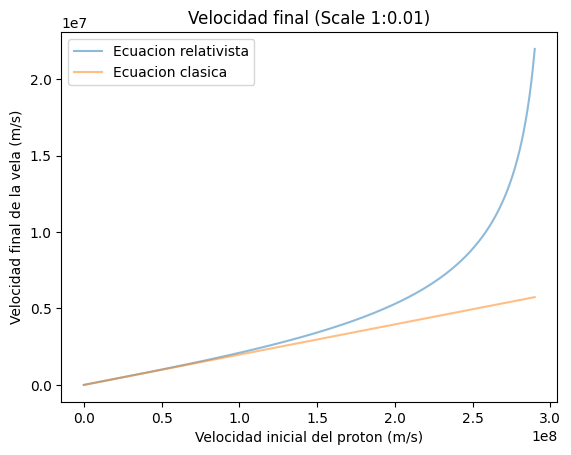

[3.15882683e+00 1.00000000e+03 2.00000998e+03 ... 2.89997000e+08
 2.89998000e+08 2.89999000e+08]
[3.15882683e+00 1.00000000e+03 2.00000998e+03 ... 2.89997000e+08
 2.89998000e+08 2.89999000e+08]
[0.00000e+00 1.00000e+03 2.00000e+03 ... 2.89997e+08 2.89998e+08
 2.89999e+08]
[0.00000e+00 1.00000e+03 2.00000e+03 ... 2.89997e+08 2.89998e+08
 2.89999e+08]


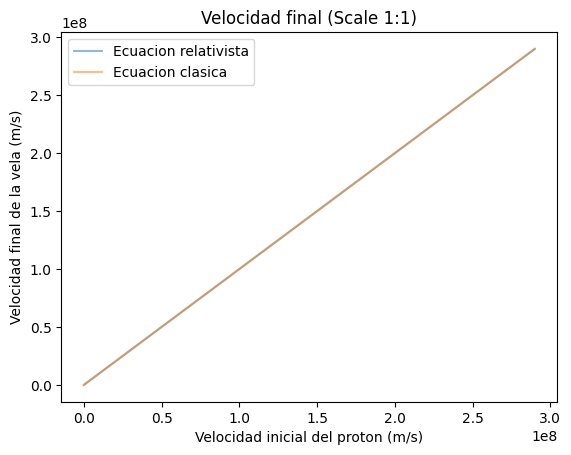

[0.00000000e+00 1.97964753e+03 3.96131036e+03 ... 2.99600962e+08
 2.99601000e+08 2.99601038e+08]
[0.00000000e+00 1.97964753e+03 3.96131036e+03 ... 2.99600962e+08
 2.99601000e+08 2.99601038e+08]
[0.00000000e+00 1.98019802e+03 3.96039604e+03 ... 5.74251485e+08
 5.74253465e+08 5.74255446e+08]
[0.00000000e+00 1.98019802e+03 3.96039604e+03 ... 5.74251485e+08
 5.74253465e+08 5.74255446e+08]


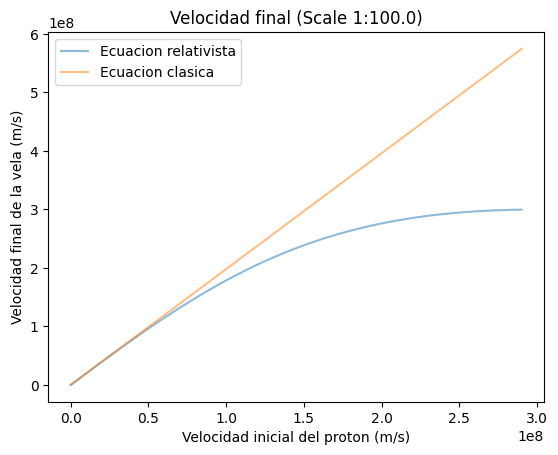

In [13]:
m = [1e-2,1,1e2]
for i in range(len(m)):
    plt.plot(np.arange(0, 2.9e8, 1000), DeltaV_relativistical(m[i], m[1], 0, np.arange(0, 2.9e8, 1000), 0, 0), label="Ecuacion relativista", alpha=0.5)
    #plt.plot(vpi,wmas, label="Ecuacion relativista")
    plt.plot(np.arange(0, 2.9e8, 1000), DeltaV_clasical(m[i], m[1], 0, np.arange(0, 2.9e8, 1000), 0, 0), label="Ecuacion clasica", alpha=0.5)
    #plt.plot(vpi,vvf2+c, label="2")
    plt.legend()
    #plt.ylim(1.192075*1e-7, 1.1921*1e-7)
    plt.title(f"Velocidad final (Scale 1:{m[i]})")
    plt.ylabel("Velocidad final de la vela (m/s)")
    plt.xlabel("Velocidad inicial del proton (m/s)")
    #plt.text(0.25, 0.55, 'Texto en Matplotlib',fontsize=5,color='gray')
    plt.show()

### Relativistic

In [14]:
def Vsf(mp, ms, vsi, vpi, I, Q, EB):
  
  #Constants
  c = 299792458 # m/s


  zsi = ms / (abs((c**2)-(vsi**2))**(1/2))
  wsi = zsi * vsi

  zpi = mp / (abs((c**2)-(vpi**2))**(1/2))
  wpi = zpi * vpi

  p = (I/c) + wpi + wsi

  e = ((EB-Q)/(c**3)) + zpi + zsi

  #vsf_1 = (4*(ms**2)*(e**2)*(c**4)) + (2*(c**2)*(e**2)*(p**2)) - ((c**4)*(p**4)) - (p**4)
  #vsf_2 = 4*e*p*(ms**2)*(c**2)
  #vsf_3 = c * (((e*c)**2) - (p**2)) * (( (((e*c)**2) - (p**2)) * (((e*c)**2) - (p**2) - (4*(ms**2))) )**(1/2))
  #vsf = (vsf_2+vsf_3)/vsf_1
  

  vsf_a = ( 8 * e * p * ((c*ms)**2))
  
  vsf_b = np.abs( ( 64 * ((e*p)**2) * ((c*ms)**4) ) + ( 4 * (c**2) * ( ((e*c)**4) - (2*((e*c*mp)**2)) - (2*((e*c*p)**2)) - (2*((e*c*ms)**2)) + (mp**4) + (2*((mp*p)**2)) - (2*((mp*ms)**2)) + (p**4) - (2*((p*ms)**2)) +(ms**4) ) * ( ((e*c)**4) - (2*((e*c*mp)**2)) - (2*((e*c*p)**2)) + (2*((e*c*ms)**2)) + (mp**4) + (2*((mp*p)**2)) - (2*((mp*ms)**2)) + (p**4) + (2*((p*ms)**2)) + (ms**4) ) ) )**(1/2)
  
  vsf_c = ( 2 * ( ((e*c)**4) - (2*((e*mp*c)**2)) - (2*((e*c*p)**2)) + (2*((e*c*ms)**2)) + (mp**4) + (2*((mp*p)**2)) - (2*((mp*ms)**2)) + (p**4) + (2*((p*ms)**2)) + (ms**4) ) )
  
  vsf = ((vsf_a+vsf_b)/vsf_c) #-(1.5*vpi)

  return vsf

In [15]:
I = 0
EB = 0
Q = 0 # J

mp = 1#1.67262192369 *1e-27 # Kg
ms = 1#00
vsi = 0
vpi = 4e5#np.arange(-1e3,1e3,1e-3)

Vsf(mp, ms, vsi, vpi, I, Q, EB)

400000.00005300896

[0.00000000e+00 2.90290290e+05 5.80580581e+05 8.70870871e+05
 1.16116116e+06 1.45145145e+06 1.74174174e+06 2.03203203e+06
 2.32232232e+06 2.61261261e+06 2.90290290e+06 3.19319319e+06
 3.48348348e+06 3.77377377e+06 4.06406406e+06 4.35435435e+06
 4.64464464e+06 4.93493493e+06 5.22522523e+06 5.51551552e+06
 5.80580581e+06 6.09609610e+06 6.38638639e+06 6.67667668e+06
 6.96696697e+06 7.25725726e+06 7.54754755e+06 7.83783784e+06
 8.12812813e+06 8.41841842e+06 8.70870871e+06 8.99899900e+06
 9.28928929e+06 9.57957958e+06 9.86986987e+06 1.01601602e+07
 1.04504505e+07 1.07407407e+07 1.10310310e+07 1.13213213e+07
 1.16116116e+07 1.19019019e+07 1.21921922e+07 1.24824825e+07
 1.27727728e+07 1.30630631e+07 1.33533534e+07 1.36436436e+07
 1.39339339e+07 1.42242242e+07 1.45145145e+07 1.48048048e+07
 1.50950951e+07 1.53853854e+07 1.56756757e+07 1.59659660e+07
 1.62562563e+07 1.65465465e+07 1.68368368e+07 1.71271271e+07
 1.74174174e+07 1.77077077e+07 1.79979980e+07 1.82882883e+07
 1.85785786e+07 1.886886

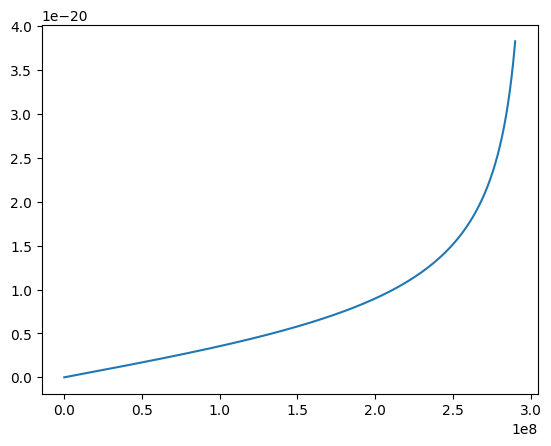

In [16]:
I = 0
EB = 0
Q = 0 # J

mp = 1.67262192369 *1e-27 # Kg
ms = 100

vsi = 0
vpi = np.linspace(0, 2.9e8, 1000)
print(vpi)

vsf = Vsf(mp, ms, vsi, vpi, I, Q, EB)
print(vsf)

plt.plot(vpi, vsf, label="Ecuacion relativista")

#### Relativistic data

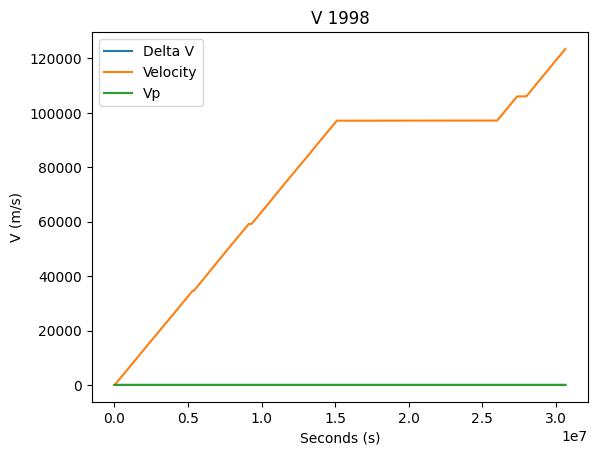

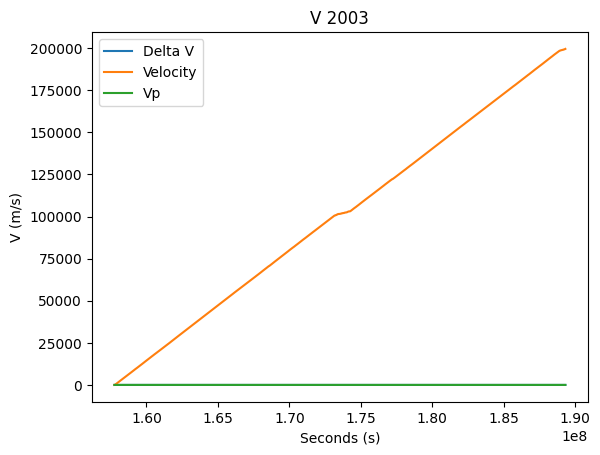

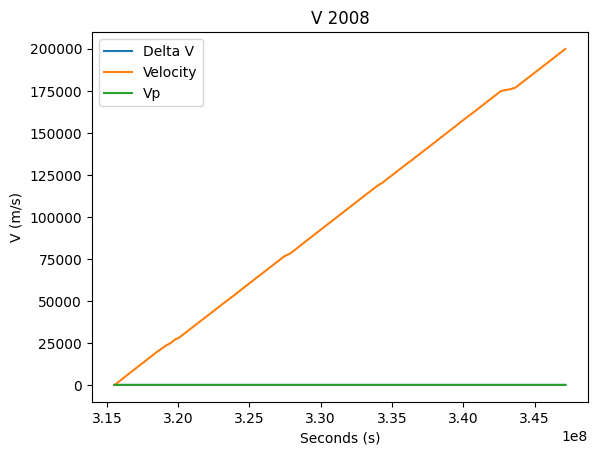

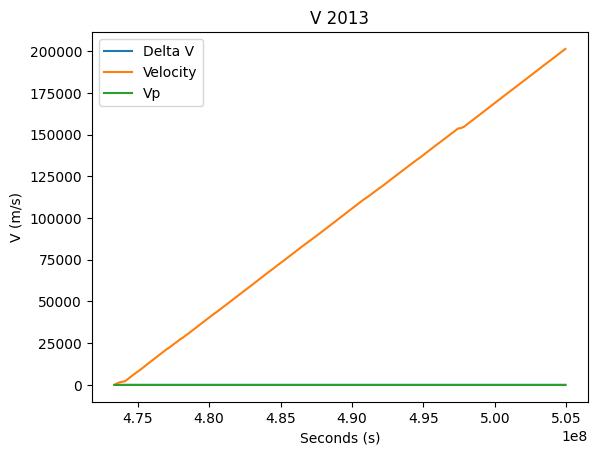

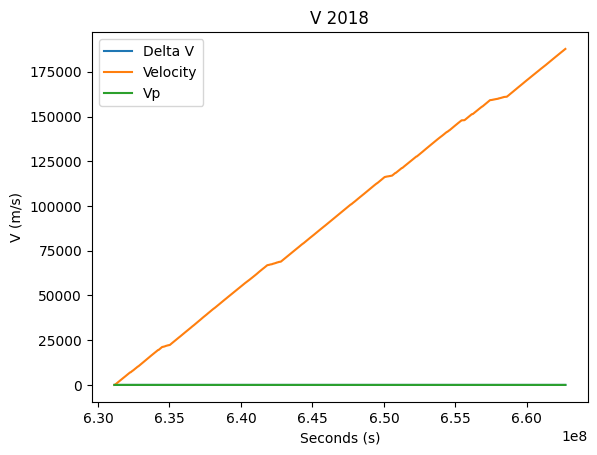

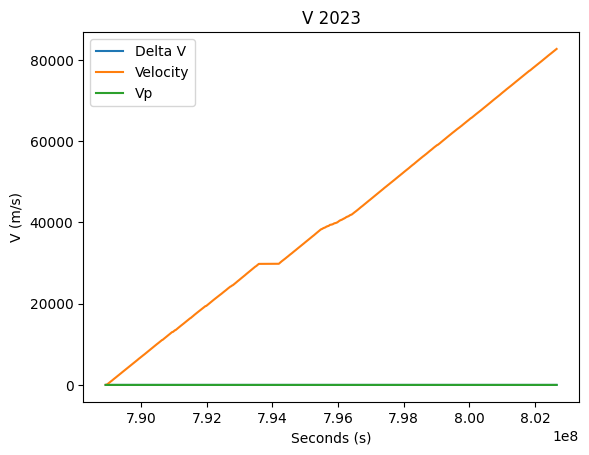

In [17]:
def DeltaVr(year):
  """

  Lineal momentum
  p_i = p_f
    m_p*v_p_i + m_s*v_s_i = m_p*v_p_f +  m_s*v_s_f

    dv_s = -(m_p / m_s) * dv_p

    if v_s_i = 0:
      m_p*v_p_i = m_p*v_p_f +  m_s*v_s_f

  Energy
  E_i = E_f
    m_p*(v_p_i**2) + m_s*(v_s_i**2) = m_p*(v_p_f**2) +  m_s*(v_s_f**2)


    if v_s_i = 0:
      m_p*(v_p_i**2) = m_p*(v_p_f**2) +  m_s*(v_s_f**2)

  """
  
  c = 299792458 # m/s

  EB = 0
  Q = 0 # J 
  I = 0

  mp = 1.67262192369 *1e-27 # Kg
  ms = 100

  v0 = 0
  
  vp = np.array(Calibrated_data[year]["SPEED"]) / 1e3 
  
  Np = np.array(Calibrated_data[year]["Np"]) * 100e3 
  
  theta = np.array(Calibrated_data[year]["N/S"]) * np.pi/180
  
  sec = np.array(Calibrated_data[year]["Seconds"])

  #t0 = sec[0]
  
  Velocity = []
  Delta_velocity = []
  for i in range(len(sec)):

    mpi = mp*Np[i]#*(sec[i]-t0)
    
    vpi = vp[i] * np.cos(theta[i])
    
    vf = Vsf(mpi, ms, v0, vpi, I, Q, EB)
    
    dv = vf-v0
    
    #t0 = sec[i]
    
    v0 = vf
    
    Velocity.append(vf)
    
    Delta_velocity.append(dv)
    

  """
  print(Velocity)
  print(Delta_velocity)
  print(len(Velocity))
  print(sec)
  print(len(sec))
  """

  plt.plot(sec, Delta_velocity, label="Delta V")
  plt.plot(sec, Velocity, label="Velocity")
  plt.plot(sec, vp, label="Vp")
  plt.ylabel("V (m/s)")
  plt.xlabel("Seconds (s)")
  plt.title(f"V {year}")
  plt.legend()
  plt.show()

  return Velocity 


Velocity = {}
for year in years:
  Velocity[year] = DeltaVr(year)

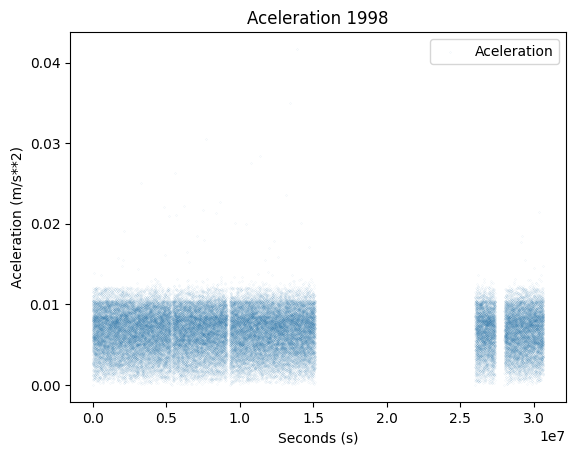

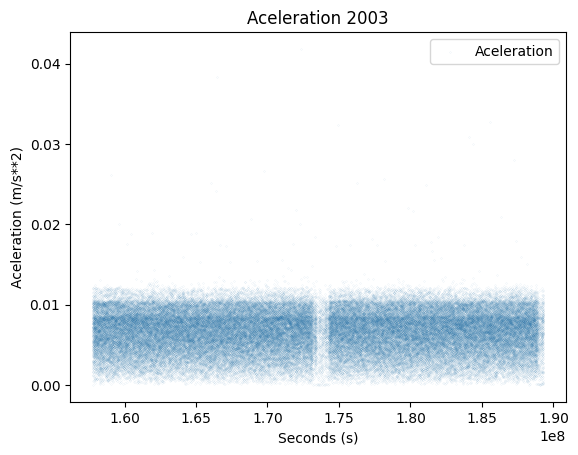

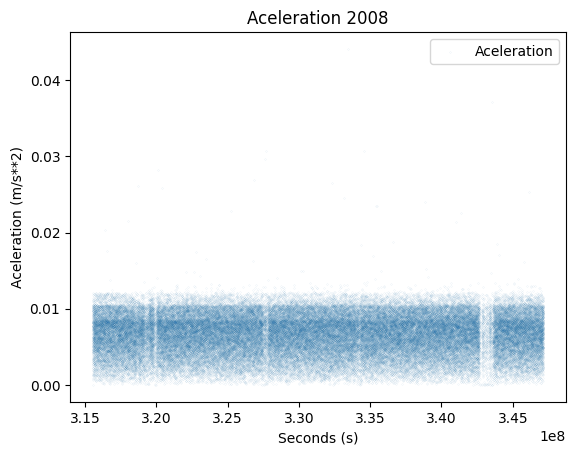

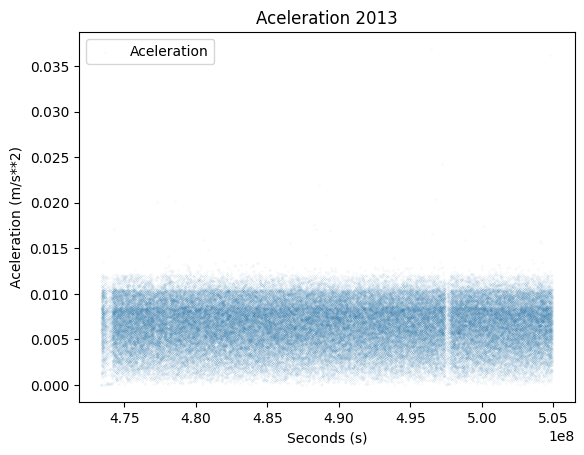

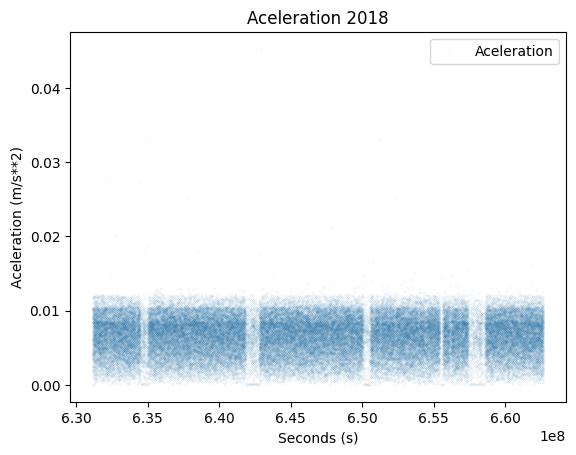

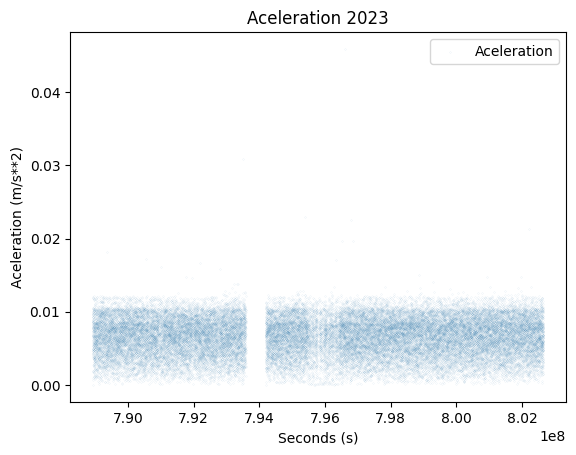

In [560]:
def DeltaVr(year):
  """

  Lineal momentum
  p_i = p_f
    m_p*v_p_i + m_s*v_s_i = m_p*v_p_f +  m_s*v_s_f

    dv_s = -(m_p / m_s) * dv_p

    if v_s_i = 0:
      m_p*v_p_i = m_p*v_p_f +  m_s*v_s_f

  Energy
  E_i = E_f
    m_p*(v_p_i**2) + m_s*(v_s_i**2) = m_p*(v_p_f**2) +  m_s*(v_s_f**2)


    if v_s_i = 0:
      m_p*(v_p_i**2) = m_p*(v_p_f**2) +  m_s*(v_s_f**2)

  """
  
  c = 299792458 # m/s

  qp = 1.602176634* 1e-19 #C 
  rw = 10*1e-6 # m
  lw = 10*1e3 # m
  As = np.pi*(lw**2) #m**2
  Ts = 12*1e3 #kV

  Q = 0 # J 

  mp = 1.67262192369 *1e-27 # Kg
  ms = 100

  v0 = 0
  
  vp = np.array(Calibrated_data[year]["SPEED"]) / 1e3 
  
  Np = np.array(Calibrated_data[year]["Np"]) * 100e3 * As
  
  theta = np.array(np.radians(Calibrated_data[year]["N/S"]))
  
  sec = np.array(Calibrated_data[year]["Seconds"])

  t0 = sec[0]
  
  Velocity = []
  Delta_velocity = []
  Aceleration = []
  for i in range(len(sec)):

    mpi = mp*Np[i]*(sec[i]-t0)
    
    vpi = vp[i] * np.cos(theta[i])
    
    W = Ts*qp*(1+(vpi/c))
    
    I = (sec[i]-t0)*W/rw 

    vf = Vsf(mpi, ms, v0, vpi, I, Q, W)
    
    dv = vf-v0
    
    a = dv/(sec[i]-sec[i-1])
    t0 = sec[i]
    
    v0 = vf
    
    Velocity.append(vf)
    
    Delta_velocity.append(dv)

    Aceleration.append(a)

  """
  print(Velocity)
  print(Delta_velocity)
  """

  #plt.plot(sec, vp, label="Vp")
  #plt.plot(sec, Delta_velocity, label="Delta V")
  #plt.plot(sec, Velocity, label="Velocity")
  plt.scatter(sec, Aceleration, label="Aceleration", s=0.001)
  plt.ylabel("Aceleration (m/s**2)")
  plt.xlabel("Seconds (s)")
  plt.title(f"Aceleration {year}")
  plt.legend()
  plt.show()
  
  """
  plt.plot(sec, vp, label="Vp")
  plt.plot(sec, Np, label="Np")
  plt.plot(sec, theta, label="Alpha")
  plt.ylabel("V (m/s)")
  plt.xlabel("Seconds (s)")
  plt.title(f"V {year}")
  plt.legend()
  plt.show()
  """
  return Aceleration

Velocity = {}
for year in years:
  Velocity[year] = DeltaVr(year)


In [556]:
Velocity

{2013: [-0.0,
  3.6240381712691325e-06,
  3.6602785529661076e-06,
  3.648198425696223e-06,
  3.648198425660466e-06,
  3.6361182983466337e-06,
  3.69651893445012e-06,
  3.624038170955739e-06,
  3.636118298068522e-06,
  3.672358679621617e-06,
  3.6361182977575685e-06,
  3.6481984248434914e-06,
  3.6965189336137538e-06,
  3.611958042780252e-06,
  3.6481984242597916e-06,
  3.6361182967890566e-06,
  3.6723586782532967e-06,
  3.6481984235302024e-06,
  3.6361182960255246e-06,
  3.6723586774210746e-06,
  3.6361182954150866e-06,
  3.6481984223195377e-06,
  3.6723586764296344e-06,
  3.636118294396648e-06,
  3.648198421249271e-06,
  3.6723586753032966e-06,
  3.636118293232597e-06,
  3.6481984200328507e-06,
  3.636118292378214e-06,
  3.6723586735747704e-06,
  3.636118291456194e-06,
  3.6723586726231945e-06,
  3.6240381632823144e-06,
  3.660278544386592e-06,
  3.6481984166408916e-06,
  3.6361182888844693e-06,
  3.6723586699323644e-06,
  3.6723586693413946e-06,
  3.6119580327347178e-06,
  3.67235866

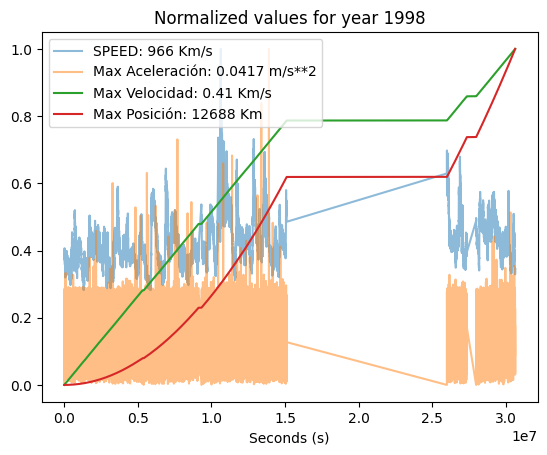

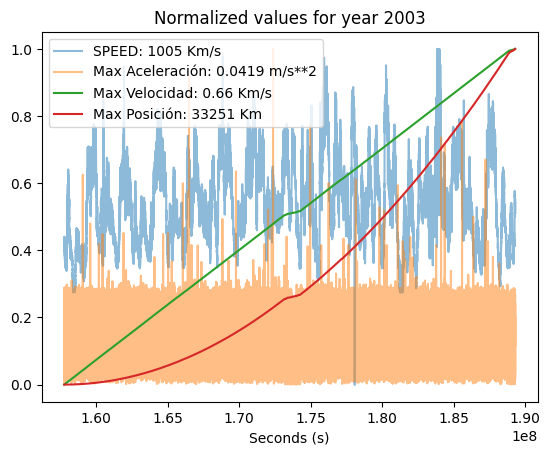

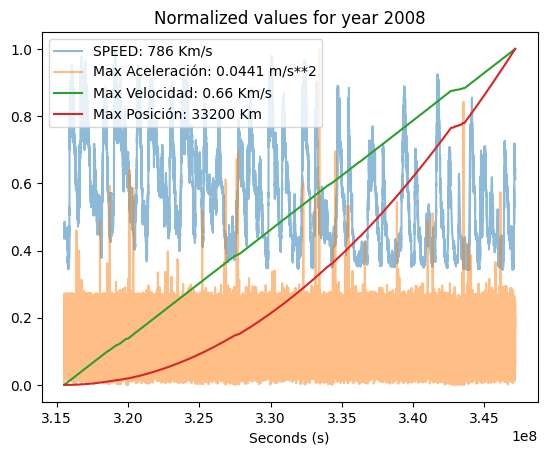

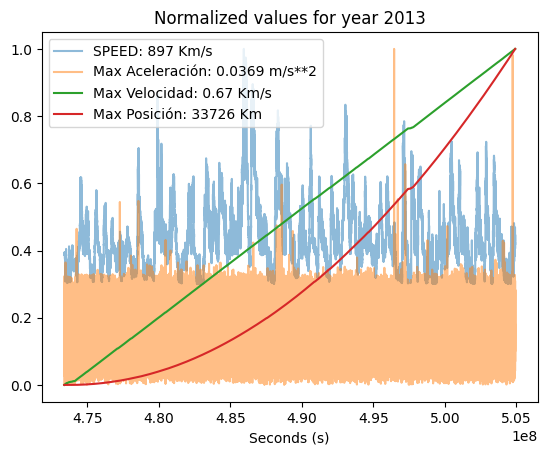

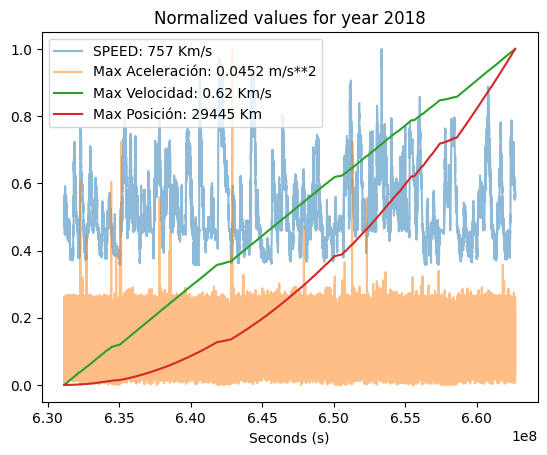

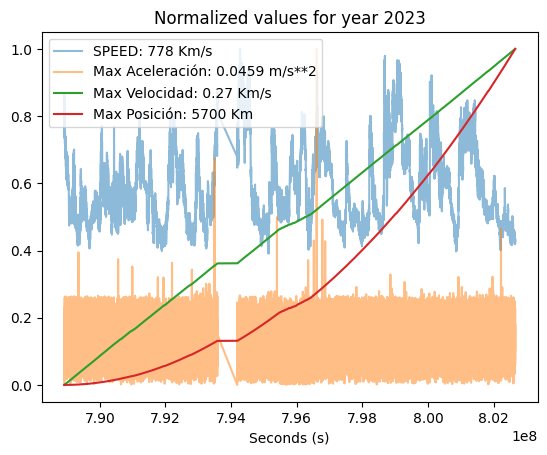

In [561]:
for year in years:
  sec = np.array(Calibrated_data[year]["Seconds"])
  vp_max = (np.max(Calibrated_data[year]["SPEED"]))
  plt.plot(sec, Calibrated_data[year]["SPEED"]/np.max(Calibrated_data[year]["SPEED"]), label=f"SPEED: {round(vp_max,2)} Km/s", alpha=0.5)
  plt.plot(sec, Velocity[year]/np.max(Velocity[year]), label=f"Max Aceleración: {round(np.max(Velocity[year]),4)} m/s**2", alpha=0.5)
  plt.plot(sec, np.cumsum(Velocity[year])/np.max(np.cumsum(Velocity[year])), label=f"Max Velocidad: {round(np.max(np.cumsum(Velocity[year]))/1e3,2)} Km/s", alpha=1)
  plt.plot(sec, np.cumsum(np.cumsum(Velocity[year]))/np.max(np.cumsum(np.cumsum(Velocity[year]))), label=f"Max Posición: {round(np.max(np.cumsum(np.cumsum(Velocity[year])))/1e3)} Km", alpha=1)
  plt.legend()
  plt.xlabel("Seconds (s)")
  plt.title(f"Normalized values for year {year}")
  plt.show()

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


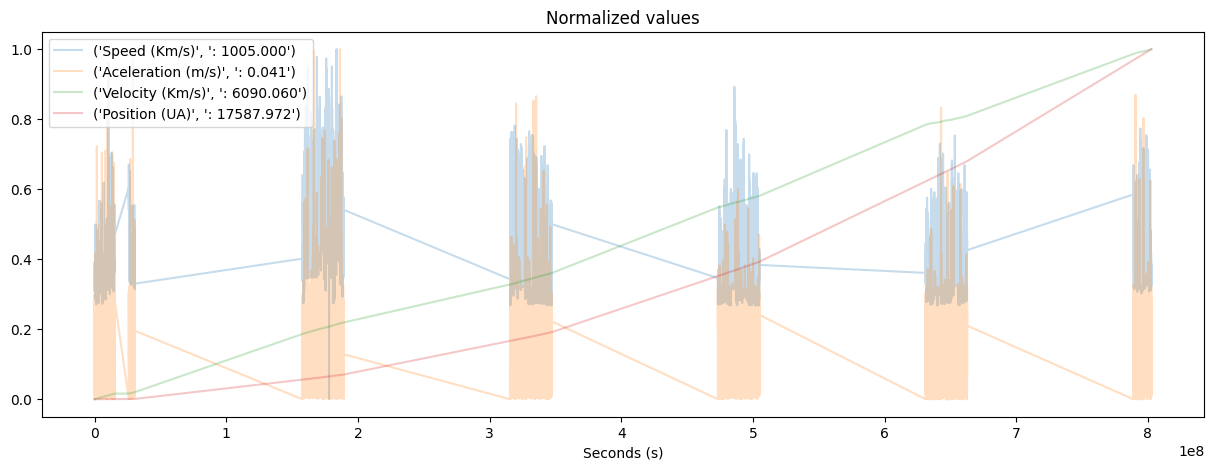

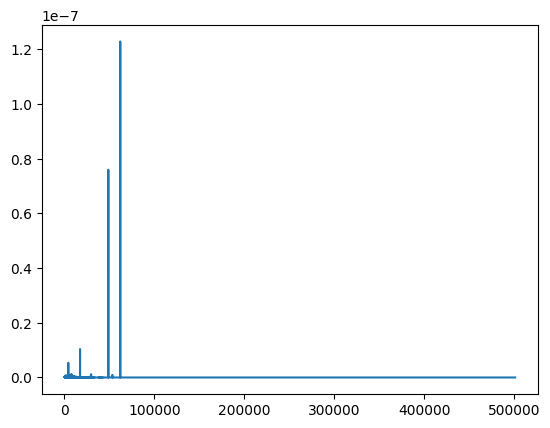

In [89]:
c = 299792458 # m/s

qp = 1.602176634* 1e-19 #C 
rw = 10*1e-6 # m
lw = 10*1e3 # m
As = np.pi*(lw**2) #m**2
Ts = 12*1e3 #kV

Q = 0 # J 

mp = 1.67262192369 *1e-27 # Kg
ms = 100

v0 = 0
r0 = 0
t0 = 0

a = 0
r_Np = 150000000000 #m

Delta_velocity = []

Aceleration = []
Velocity = []
Position = []
Speed = []
Mass = []
Momentum = []
Time = []

for year in years:
  vp = np.array(Calibrated_data[year]["SPEED"]) * 1e3 
  Np = np.array(Calibrated_data[year]["Np"]) * 100e3 
  theta = np.array(Calibrated_data[year]["N/S"] * np.pi/180)
  sec = np.array(Calibrated_data[year]["Seconds"])
  
  #v0 = (a*(sec[0]-t0)) + v0
  v0 = ((a*(sec[0]-t0)) + v0)*c/(((c**2)+(((a*(sec[0]-t0)) + v0)**2))**(1/2))

  for i in range(len(sec)):

    mpi = np.abs(mp*Np[i]*(sec[i]-t0)*As*((r_Np**2)/((r_Np+r0)**2)))
    vpi = np.abs(vp[i] * np.cos(theta[i]))
    W = np.abs(Ts*qp*(1+(vpi/c)))
    I = np.abs((sec[i]-t0)*W/rw) 
    vf = Vsf(mpi, ms, v0, vpi, I, Q, W)
    
    dv = vf-v0
    
    a = dv/(sec[i]-sec[i-1])
    v = (a*(sec[i]-t0)) + v0
    r = (v*(sec[i]-t0)) + r0
    
    t0 = sec[i]
    v0 = v
    r0 = r
    
    #Vel.append(vf)
    
    Delta_velocity.append(dv)

    Aceleration.append(a)
    Velocity.append(v)
    Position.append(r)
    Speed.append(vpi)
    Mass.append(mpi)
    Momentum.append(mpi*vpi)
    Time.append(t0)


prop = [Speed, Aceleration, Velocity, Position] # Mass, Momentum, Delta_velocity,
name = ["Speed (Km/s)", "Aceleration (m/s)", "Velocity (Km/s)", "Position (UA)"] # "Mass", "Momentum", "Delta_velocity",
c_max = [1e3, 1, 1e3, 1.496e11]


plt.figure(figsize=(15,5))
for i in range(len(prop)):
    max = np.max(prop[i])/c_max[i]
    #plt.scatter(Time, prop[i]/np.max(prop[i]), label= (name[i], ": {:.3f}".format(max)), alpha=0.25, s=0.001)
    plt.plot(Time, prop[i]/np.max(prop[i]), label= (name[i], ": {:.3f}".format(max)), alpha=0.25)
plt.legend()
plt.xlabel("Seconds (s)")
plt.title(f"Normalized values")
plt.show()

plt.plot(Mass)

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


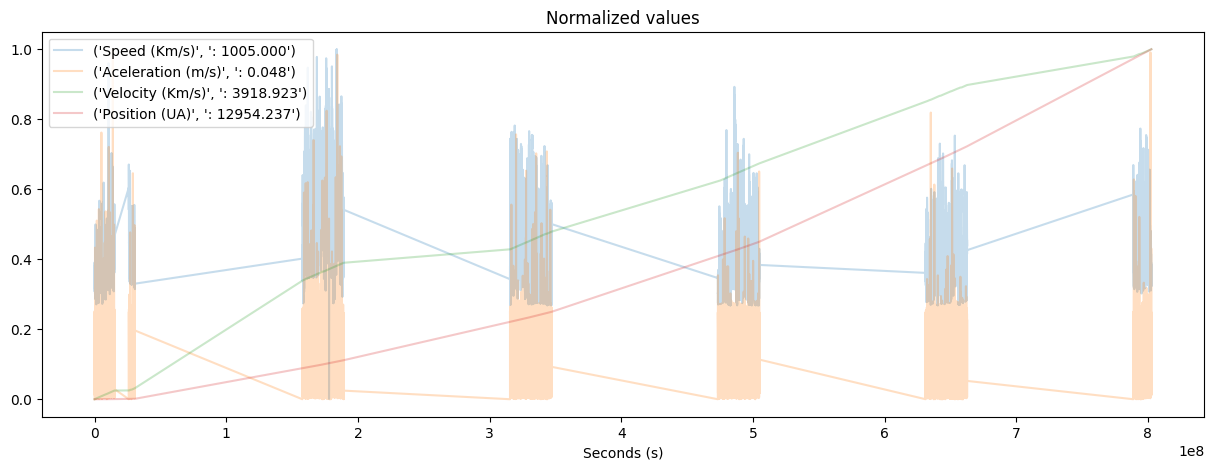

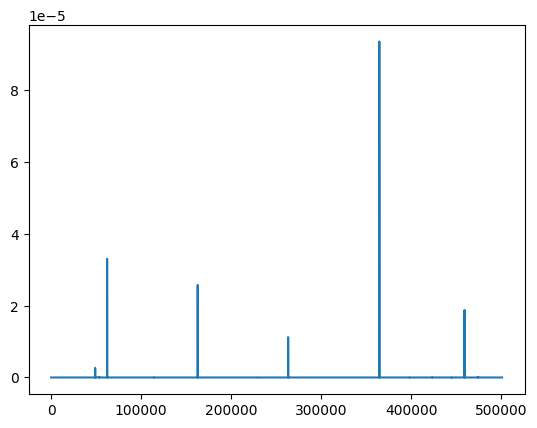

In [91]:
c = 299792458 # m/s

qp = 1.602176634* 1e-19 #C 
rw = 10*1e-6 # m
lw = 10*1e3 # m
As = np.pi*(lw**2) #m**2
Ts = 12*1e3 #kV

Q = 0 # J 

mp = 1.67262192369 *1e-27 # Kg
ms = 100

v0 = 0
r0 = 0
t0 = 0

a = 0
r_Np = 150000000000 #m

Delta_velocity = []

Aceleration = []
Velocity = []
Position = []
Speed = []
Mass = []
Momentum = []
Time = []

for year in years:
  vp = np.array(Calibrated_data[year]["SPEED"]) * 1e3 
  Np = np.array(Calibrated_data[year]["Np"]) * 100e3 
  theta = np.array(Calibrated_data[year]["N/S"] * np.pi/180)
  sec = np.array(Calibrated_data[year]["Seconds"])
  
  #v0 = (a*(sec[0]-t0)) + v0
  v0 = ((a*(sec[0]-t0)) + v0)*c/(((c**2)+(((a*(sec[0]-t0)) + v0)**2))**(1/2))

  for i in range(len(sec)):

    mpi = np.abs(mp*Np[i]*(sec[i]-t0)*As)#*((r_Np**2)/((r_Np+r0)**2))
    vpi = np.abs(vp[i] * np.cos(theta[i]))
    W = np.abs(Ts*qp*(1+(vpi/c)))
    I = np.abs((sec[i]-t0)*W/rw) 
    vf = Vsf(mpi, ms, v0, vpi, I, Q, W)
    
    dv = vf-v0
    
    a = dv/(sec[i]-sec[i-1])
    v = (a*(sec[i]-t0)) + v0
    r = (v*(sec[i]-t0)) + r0
    
    t0 = sec[i]
    v0 = v
    r0 = r
    
    #Vel.append(vf)
    
    Delta_velocity.append(dv)

    Aceleration.append(a)
    Velocity.append(v)
    Position.append(r)
    Speed.append(vpi)
    Mass.append(mpi)
    Momentum.append(mpi*vpi)
    Time.append(t0)


prop = [Speed, Aceleration, Velocity, Position] # Mass, Momentum, Delta_velocity,
name = ["Speed (Km/s)", "Aceleration (m/s)", "Velocity (Km/s)", "Position (UA)"] # "Mass", "Momentum", "Delta_velocity",
c_max = [1e3, 1, 1e3, 1.496e11]


plt.figure(figsize=(15,5))
for i in range(len(prop)):
    max = np.max(prop[i])/c_max[i]
    #plt.scatter(Time, prop[i]/np.max(prop[i]), label= (name[i], ": {:.3f}".format(max)), alpha=0.25, s=0.001)
    plt.plot(Time, prop[i]/np.max(prop[i]), label= (name[i], ": {:.3f}".format(max)), alpha=0.25)
plt.legend()
plt.xlabel("Seconds (s)")
plt.title(f"Normalized values")
plt.show()

plt.plot(Mass)

In [162]:
#Inelastic
def Vsfe(mp, ms, vsi, vpi, I, EB, Q):
  
  #Constants
  c = 299792458 # m/s


  zsi = ms / (abs((c**2)-(vsi**2))**(1/2))
  wsi = zsi * vsi

  zpi = mp / (abs((c**2)-(vpi**2))**(1/2))
  wpi = zpi * vpi

  p = (I/c) + wpi + wsi

  #e = ((EB-Q)/(c**3)) + zpi + zsi
  P = p/(ms+mp)
  
  vsf = P*c/((1+(P**2))**(1/2)) #-(1.5*vpi)

  return vsf

In [118]:
Vsfe(1.67262192369 *1e-27, 100, 0, 4e5, 0)

6.69049365010516e-24

In [348]:
def Vsfc(mp, mv, vvi, vpi, I, EB, Q):
   
    Ec = (2*(EB-Q)) + (mp*(vpi**2)) + (mv*(vvi**2))
   
    Pc = I + (mp*vpi) + (mv*vvi)

    a = Pc

    b = ( abs( (Pc**2) + (((mv+mp)/mv)*((Ec*mp)-(Pc**2))) ) ** (1/2) )

    c = (mv + mp)

    vvfc_mas = (a+b)/c

    vvfc_menos = (a-b)/c

    vvfc = vvfc_mas

    return vvfc

In [159]:
Vsfc(1.67262192369 *1e-27, 100, 0, 4e5, 0,0,0)

1.338097538952e-23

In [612]:
  
c = 299792458 # m/s Velocidad de la luz

qp = 1.602176634e-19 #C Carga electrica de un proton
rw = 10*1e-6 # m Radio del cable de la vela
lw = 20*1e3 # m LOngitud del cable
As = np.pi*(lw**2) #m**2 Area de la vela
Ts = 12*1e3 #kV Potencial electrico de la vela

Q = 0

mp = 1.67262192369 *1e-27 # Kg Masa de un proton
ms = 200 # Masa de la vel Kg

a = 0 #Aceleracion inicial
#ac = 0
#v0c = 0
v0 = 0 # Velocidad inicial
r0 = 0 # POsición inicial desde la tierra
r_Np = 150000000000 #m # Posición de la tierra al sol

t = Calibrated_data[years[0]]["Seconds"][0]
t0 = 0 # TIempo iniicial
y0 = years[0]

Delta_velocity = []
Aceleration = []
Velocity = []
Velocity_Clasical = []
Position = []
Speed = []
Mass = []
Momentum = []
Time = []
         
for year in years[1:]:
  t = Calibrated_data[year]["Seconds"][0]
  vp = np.abs(Calibrated_data[year]["SPEED"]) * 1e3 
  Np = np.abs(Calibrated_data[year]["Np"]) * 100e3
  theta = np.abs(Calibrated_data[year]["N/S"]) * np.pi/180
  sec = np.abs(Calibrated_data[year]["Seconds"]) - t + t0 #+ (3600*24*365*(year - y0))
  y0 = year



  """
  vi = (a*(sec[0]-t0)) + v0
  #vi = ((a*(sec[0]-t0)) + v0)*c/(((c**2)+(((a*(sec[0]-t0)) + v0)**2))**(1/2)) + v0
  ri = (vi*(sec[0]-t0)) + r0

  if ri > 120*r_Np:
    #vi = (( (2*a*(r0**2)*((1/(r_Np+r0))-(1/(r_Np+(120*r_Np))))) + (v0**2) ) ** (1/2))
    vi = (( (2*a*((r0/(120*r_Np)))) + (v0**2) )**(1/2)) + v0
    ri = (vi*(sec[0]-t0)) + r0
    a = 0

  ti = sec[0]
  v0 = vi
  r0 = ri
  """

  for i in range(len(sec)):
      
    #if r0 > 120*r_Np:
    #  dv = 0
    #else:
    
    #v0 = ((a*abs(sec[i]-t0)) + v0)*c/(((c**2)+(((a*abs(sec[i]-t0)) + v0)**2))**(1/2))
    v0 = (a*(sec[i]-t0)) + v0
    r0 = (v0*(sec[i]-t0)) + r0

    if r0 > 120*r_Np or v0 > vpi:
      #v0 = (( (2*a*((r0/(120*r_Np)))) + (v0**2) )**(1/2))
      #r0 = (v0*(sec[0]-t0)) + r0

      dv = 0
      a = 0
      v = v0
      #dvc = 0
      #ac = 0
      #vc = v0c

      mpi = mp#*Np[i]*As*(2*rw)*(sec[i]-t0)  
      vpi = vp[i] * np.cos(theta[i])
    
    else:
      
      #mpi = mp#*Np[i]*As*(2*rw)*(sec[i]-t0)  
      vpi = vp[i] * np.cos(theta[i])

      W = Ts*qp*(1+(vpi/c))#*Np[i]*As*(2*rw)*((r_Np**2)/((r_Np+r0)**2))*(sec[i]-t0)
      I  = (sec[i]-t0)*W/rw
  
      v = Vsfc(mpi, ms, v0, vpi, I, W, Q)
      #vfc = Vsf(mpi, ms, v0c, vpi, I, W, Q)
      dv = v-v0
      #dvc = vf-v0

      if sec[i] - t0 == 0:
        a = a*((r_Np**2)/((r_Np+r0)**2))
        #ac = ac
      else:
        a = (dv/(sec[i]-t0))*Np[i]*As*(rw)*((r_Np**2)/((r_Np+r0)**2))
        #ac = dvc/(sec[i]-t0)
    
      #v = a*(sec[i]-t0) + v0
      #v = ((a*(sec[i]-t0)) + v0)*c/(((c**2)+(((a*(sec[i]-t0)) + v0)**2))**(1/2))
      #r = (v*(sec[i]-t0)) + r0
    
    t0 = sec[i]
    #ti = t0

    #v0 = v
    #voc = vc
    #r0 = r

    Delta_velocity.append(dv)
    Aceleration.append(a)
    Velocity.append(v)
    #Velocity_Clasical.append(vc)
    Position.append(r0)
    Speed.append(vpi)
    Mass.append(mp*Np[i]*As*(2*rw)*((r_Np**2)/((r_Np+r0)**2)))
    Momentum.append(mp*Np[i]*As*(2*rw)*((r_Np**2)/((r_Np+r0)**2))*vpi)
    Time.append(t0)





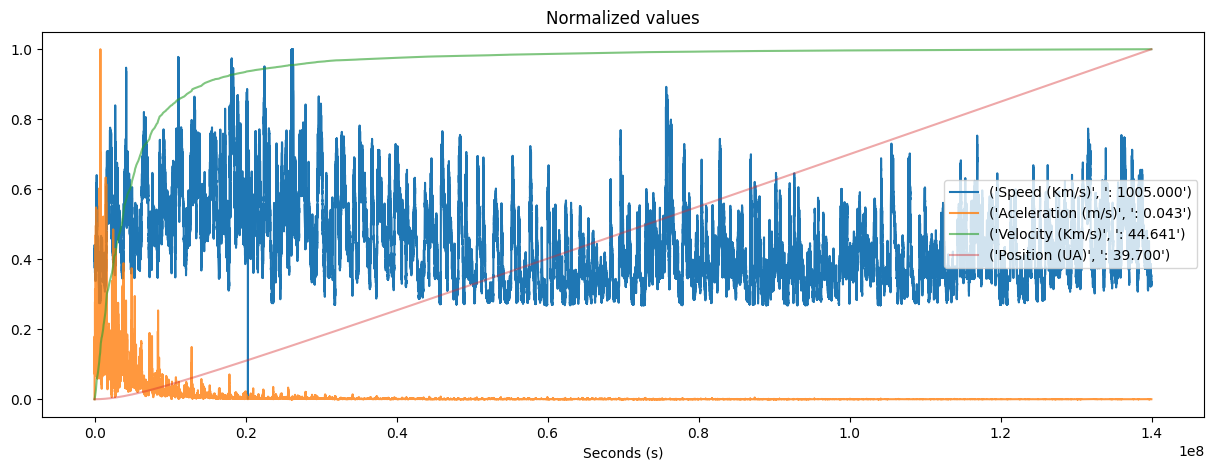

In [613]:
prop = [Speed, Aceleration, Velocity, Position]#, Mass, Momentum, Delta_velocity]
name = ["Speed (Km/s)", "Aceleration (m/s)", "Velocity (Km/s)", "Position (UA)"]#, "Mass (Kg)", "Momentum (Kg*m/s)", "Delta_velocity (m/s)"]
c_max = [1e3, 1, 1e3, 1.496e11]#,1,1,1]


plt.figure(figsize=(15,5))

for i in range(len(prop)):
    max = np.max(prop[i])/c_max[i]
    #plt.scatter(Time, prop[i]/np.max(prop[i]), label= (name[i], ": {:.3f}".format(max)), alpha=0.25, s=0.001)
    plt.plot(Time, prop[i]/np.max(prop[i]), label= (name[i], ": {:.3f}".format(max)), alpha=(1-(i/(len(prop)+1))) )

plt.legend()
plt.xlabel("Seconds (s)")
plt.title(f"Normalized values")
plt.show()

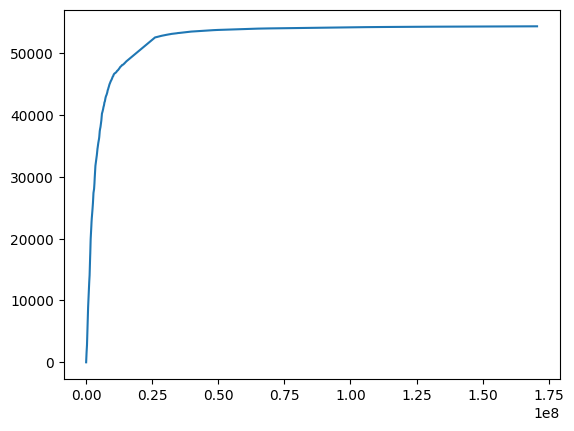

In [611]:
plt.plot(Time, Velocity)
#plt.yscale("log")

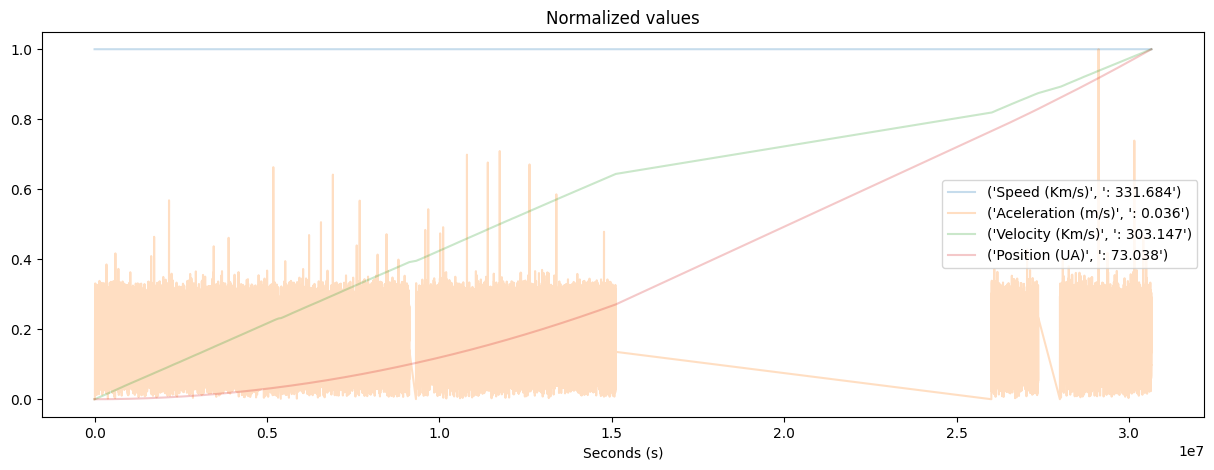

In [417]:
plt.figure(figsize=(15,5))
for i in range(len(prop)):
    max = np.max(prop[i][0:len(Calibrated_data[years[0]]["SPEED"])])/c_max[i]
    #plt.scatter(Time, prop[i]/np.max(prop[i]), label= (name[i], ": {:.3f}".format(max)), alpha=0.25, s=0.001)
    plt.plot(Time[0:len(Calibrated_data[years[0]]["SPEED"])], prop[i][0:len(Calibrated_data[years[0]]["SPEED"])]/np.max(prop[i][0:len(Calibrated_data[years[0]]["SPEED"])]), label= (name[i], ": {:.3f}".format(max)), alpha=0.25)
plt.legend()
plt.xlabel("Seconds (s)")
plt.title(f"Normalized values")
plt.show()

In [311]:
np.max(Np)/100e2

59.64